In [80]:
import pandas as pd
import numpy as np
df = pd.read_csv('SDSS_quasar.dat', delimiter='\s+')
data = np.array(df[['z', 'u_mag']])
z = data[:, 0]
u_mag = data[:, 1]

In [79]:
df.head()

,SDSS_J,R.A.,Dec.,z,u_mag,sig_u,g_mag,sig_g,r_mag,sig_r,...,sig_z,Radio,X-ray,J_mag,sig_J,H_mag,sig_H,K_mag,sig_K,M_i
0,000009.26+151754.5,0.038605,15.298476,1.1986,19.921,0.042,19.811,0.036,19.386,0.017,...,0.069,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-25.085
1,000009.38+135618.4,0.039088,13.938447,2.2400,19.218,0.026,18.893,0.022,18.445,0.018,...,0.033,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-27.419
2,000009.42-102751.9,0.039269,-10.464428,1.8442,19.249,0.036,19.029,0.027,18.980,0.021,...,0.047,0.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-26.459
3,000011.41+145545.6,0.047547,14.929353,0.4596,19.637,0.030,19.466,0.024,19.362,0.022,...,0.047,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-22.728
4,000011.96+000225.3,0.049842,0.040372,0.4790,18.237,0.028,17.971,0.020,18.025,0.019,...,0.029,0.0,-1.66,16.651,0.136,15.82,0.149,14.821,0.111,-24.046


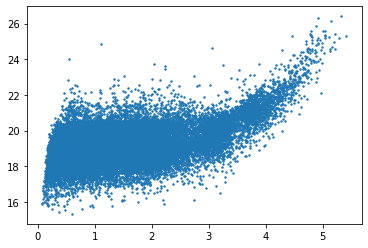

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(z, np.array(df['g_mag']), s=2)

In [72]:
def bootstrap_resample(X, n):
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

In [73]:
from scipy.stats import spearmanr as spr
corr_samples = np.empty(shape=(1500, 1))

In [74]:
for i in range(1500):
    resample = bootstrap_resample(data, n=1500)
    rho, pval = spr(resample)
    corr_samples[i] = rho

In [75]:
corr_samples

array([[0.35749316],
       [0.41113193],
       [0.33778325],
       ...,
       [0.34476234],
       [0.36236818],
       [0.39542631]])

In [67]:
spr(data)

SpearmanrResult(correlation=0.02584813562412416, pvalue=0.17784135169696613)

(array([  1.,   1.,   4.,   7.,  12.,  32.,  37.,  57.,  93., 110., 118.,
        168., 135., 172., 128., 117., 110.,  72.,  56.,  33.,  22.,   8.,
          3.,   1.,   3.]),
 array([0.25107504, 0.25943657, 0.26779809, 0.27615962, 0.28452115,
        0.29288267, 0.3012442 , 0.30960573, 0.31796726, 0.32632878,
        0.33469031, 0.34305184, 0.35141336, 0.35977489, 0.36813642,
        0.37649794, 0.38485947, 0.393221  , 0.40158253, 0.40994405,
        0.41830558, 0.42666711, 0.43502863, 0.44339016, 0.45175169,
        0.46011322]),
 <a list of 25 Patch objects>)

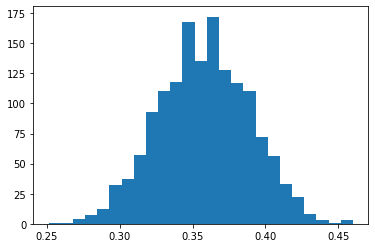

In [76]:
plt.hist(corr_samples, bins = 25)